In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Airbnb_Texas_Rentals.csv")
df.head()

,Avg_Rate,Bedrooms,City,Listing_Date,Description,latitude,longitude,Name,url
0,$27,2,Humble,May-16,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,$149,4,San Antonio,Nov-10,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...
2,$59,1,Houston,Jan-17,'River house on island close to the city' \nA ...,29.829352,-95.081549,River house near the city,https://www.airbnb.com/rooms/16926307?location...
3,$60,1,Bryan,Feb-16,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...
4,$75,2,Fort Worth,Feb-17,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...


In [8]:
#Basic Inspection
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nGeneral Info:\n")
df.info()

Dataset Shape: (18259, 9)

Column Data Types:
 Avg_Rate         object
Bedrooms         object
City             object
Listing_Date     object
Description      object
latitude        float64
longitude       float64
Name             object
url              object
dtype: object

Missing Values:
 Avg_Rate        28
Bedrooms         3
City             0
Listing_Date     0
Description      2
latitude        34
longitude       34
Name             3
url              0
dtype: int64

General Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Avg_Rate      18231 non-null  object 
 1   Bedrooms      18256 non-null  object 
 2   City          18259 non-null  object 
 3   Listing_Date  18259 non-null  object 
 4   Description   18257 non-null  object 
 5   latitude      18225 non-null  float64
 6   longitude     18225 non-null  float64
 7   Name 

In [9]:
#Clean Avg_Rate column
df['Avg_Rate'] = df['Avg_Rate'].str.replace('$', '', regex=False)  # Remove '$'
df['Avg_Rate'] = pd.to_numeric(df['Avg_Rate'], errors='coerce')    # Convert to float


In [10]:
# Drop columns with too many missing values (threshold example: 40%)
threshold = 0.1
df = df[df.columns[df.isnull().mean() < threshold]]

In [11]:
#Clean Bedrooms column
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')  # Convert to float, invalid become NaN

#Check how many nulls we have now
print("Missing Bedrooms after conversion:", df['Bedrooms'].isnull().sum())


Missing Bedrooms after conversion: 1029


In [12]:
#Fill missing values using the recommended method
df = df.fillna({
    'Avg_Rate': df['Avg_Rate'].median(),
    'Bedrooms': df['Bedrooms'].median()
})

In [13]:
# Convert Listing_Date to datetime
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'], format='%b-%y', errors='coerce')

# Optional: Extract year and month if needed later
df['Listing_Year'] = df['Listing_Date'].dt.year
df['Listing_Month'] = df['Listing_Date'].dt.month

In [14]:
# Drop rows with missing latitude or longitude
df = df.dropna(subset=['latitude', 'longitude']).reset_index(drop=True)


In [15]:
# Clean Description and Name columns
df['Description'] = df['Description'].fillna("No description").str.strip()
df['Name'] = df['Name'].fillna("No name").str.strip()


In [16]:
# Final check and save
df.reset_index(drop=True, inplace=True)

# Preview final cleaned data
print("Final Shape:", df.shape)
print(df.head())

# Save cleaned data
df.to_csv("Cleaned_Airbnb_Texas.csv", index=False)


Final Shape: (18225, 11)
   Avg_Rate  Bedrooms         City Listing_Date  \
0      27.0       2.0       Humble   2016-05-01   
1     149.0       4.0  San Antonio   2010-11-01   
2      59.0       1.0      Houston   2017-01-01   
3      60.0       1.0        Bryan   2016-02-01   
4      75.0       2.0   Fort Worth   2017-02-01   

                                         Description   latitude  longitude  \
0  Welcome to stay in private room with queen bed...  30.020138 -95.293996   
1  Stylish, fully remodeled home in upscale NW – ...  29.503068 -98.447688   
2  'River house on island close to the city' \nA ...  29.829352 -95.081549   
3  Private bedroom in a cute little home situated...  30.637304 -96.337846   
4  Welcome to our original 1920's home. We recent...  32.747097 -97.286434   

                                                Name  \
0    2 Private rooms/bathroom 10min from IAH airport   
1  Unique Location! Alamo Heights - Designer Insp...   
2                          Rive

1.Top 10 Cities with Most Listings

<ipython-input-17-4314681f0c8d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


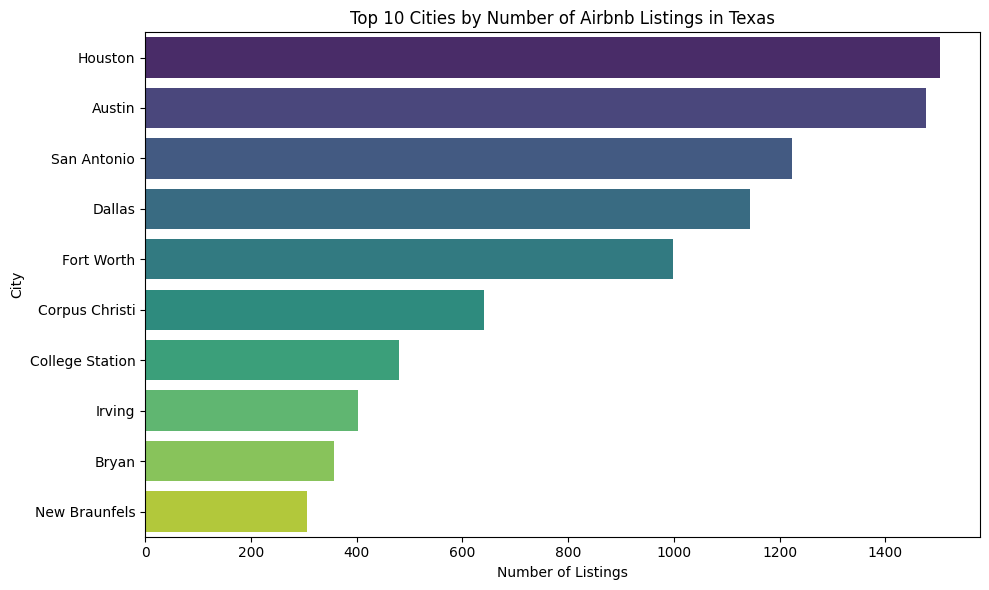

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 cities by count of listings
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities by Number of Airbnb Listings in Texas")
plt.xlabel("Number of Listings")
plt.ylabel("City")
plt.tight_layout()
plt.show()

2.Distribution of Prices

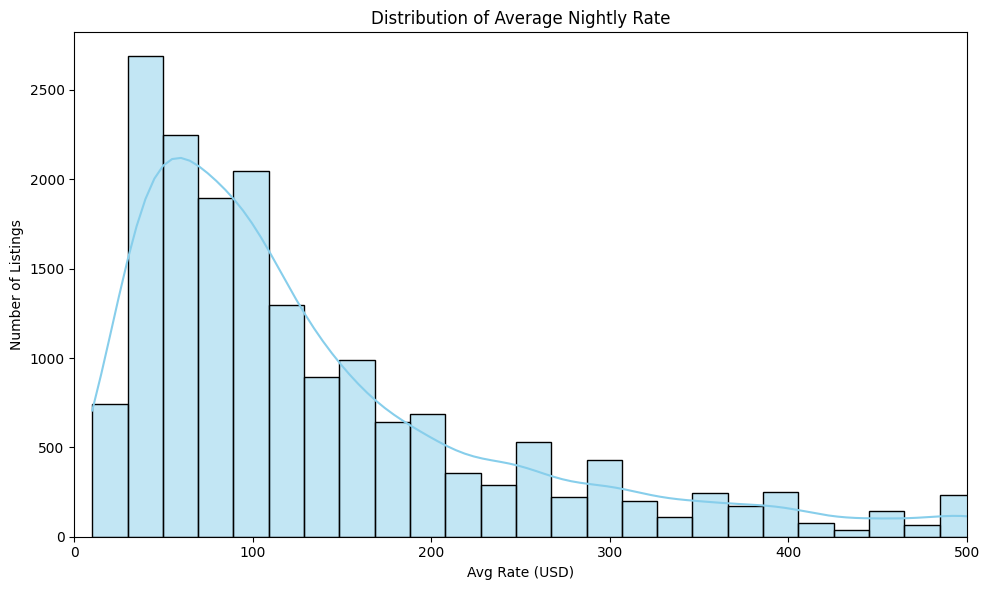

In [18]:
# Distribution of Avg_Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg_Rate'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Average Nightly Rate")
plt.xlabel("Avg Rate (USD)")
plt.ylabel("Number of Listings")
plt.xlim(0, 500)  # Limit to $500 to avoid extreme outliers skewing the plot
plt.tight_layout()
plt.show()

3.Average Price by Top 10 Cities

<ipython-input-19-a999fd920900>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_city.values, y=avg_price_city.index, palette='magma')


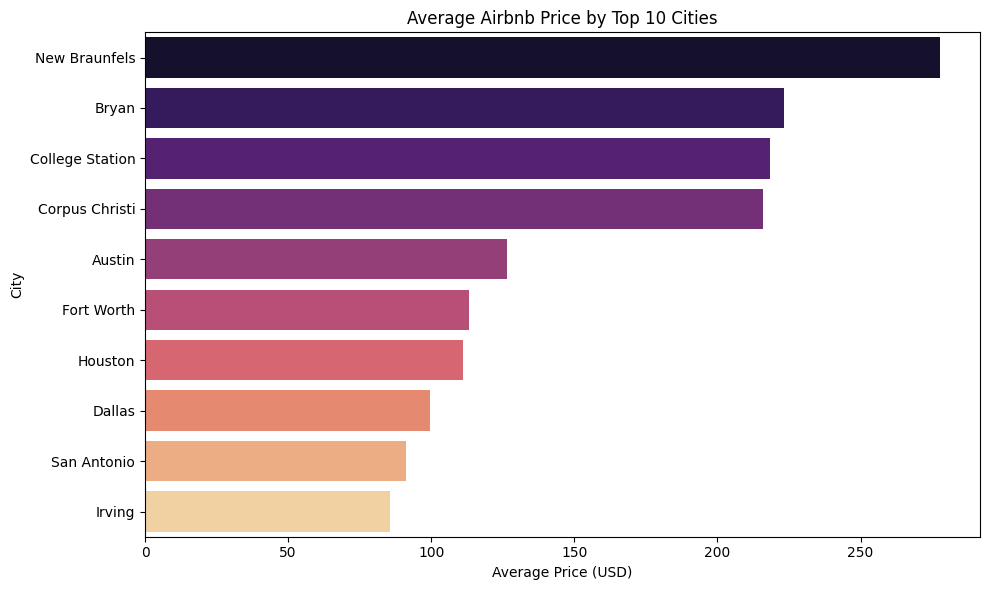

In [19]:
# Average Price by Top 10 Cities (most active ones)
top_cities = df['City'].value_counts().head(10).index
avg_price_city = df[df['City'].isin(top_cities)].groupby('City')['Avg_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_city.values, y=avg_price_city.index, palette='magma')
plt.title("Average Airbnb Price by Top 10 Cities")
plt.xlabel("Average Price (USD)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

4.Bedrooms vs. Average Price

<ipython-input-20-cca2df7a0c82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_bedroom.index, y=avg_price_bedroom.values, palette='coolwarm')


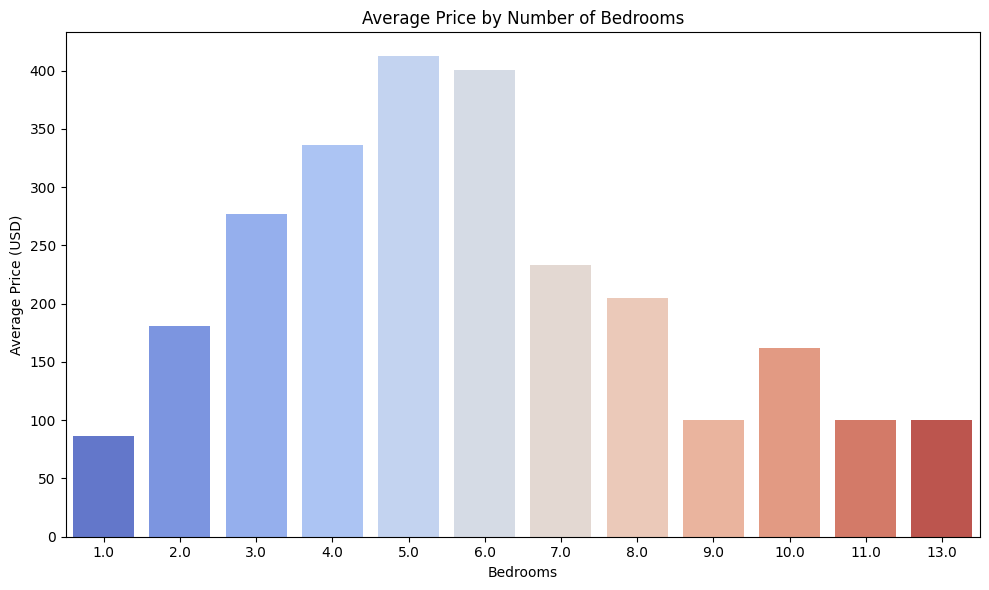

In [20]:
# Average Price by Number of Bedrooms
avg_price_bedroom = df.groupby('Bedrooms')['Avg_Rate'].mean().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_bedroom.index, y=avg_price_bedroom.values, palette='coolwarm')
plt.title("Average Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price (USD)")
plt.tight_layout()
plt.show()


5.Listings Over Time by Year

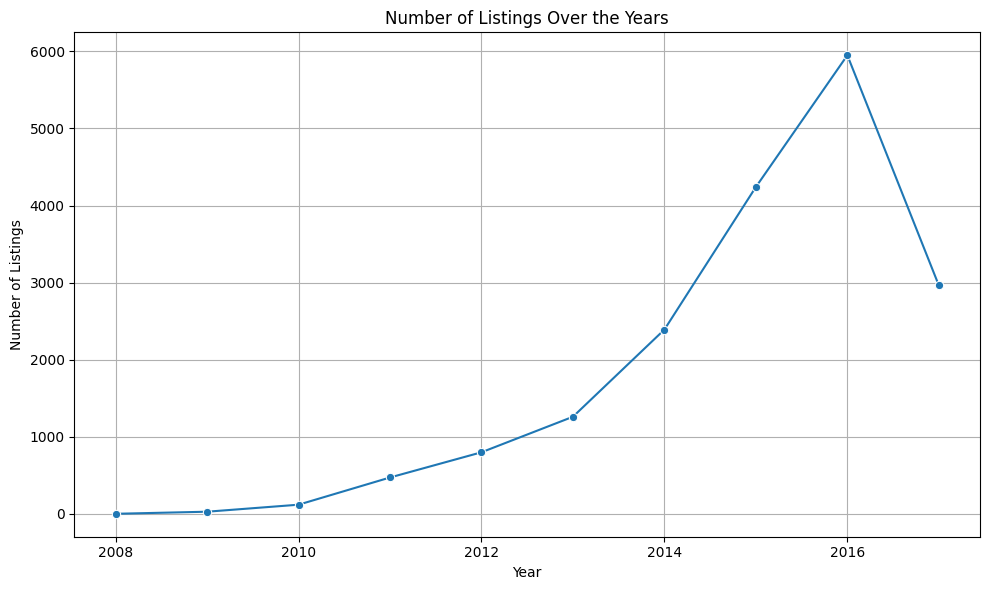

In [21]:
# Number of Listings by Year
yearly_counts = df['Listing_Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Number of Listings Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.tight_layout()
plt.show()


6.Heatmap of Listings (Lat/Lon Density)

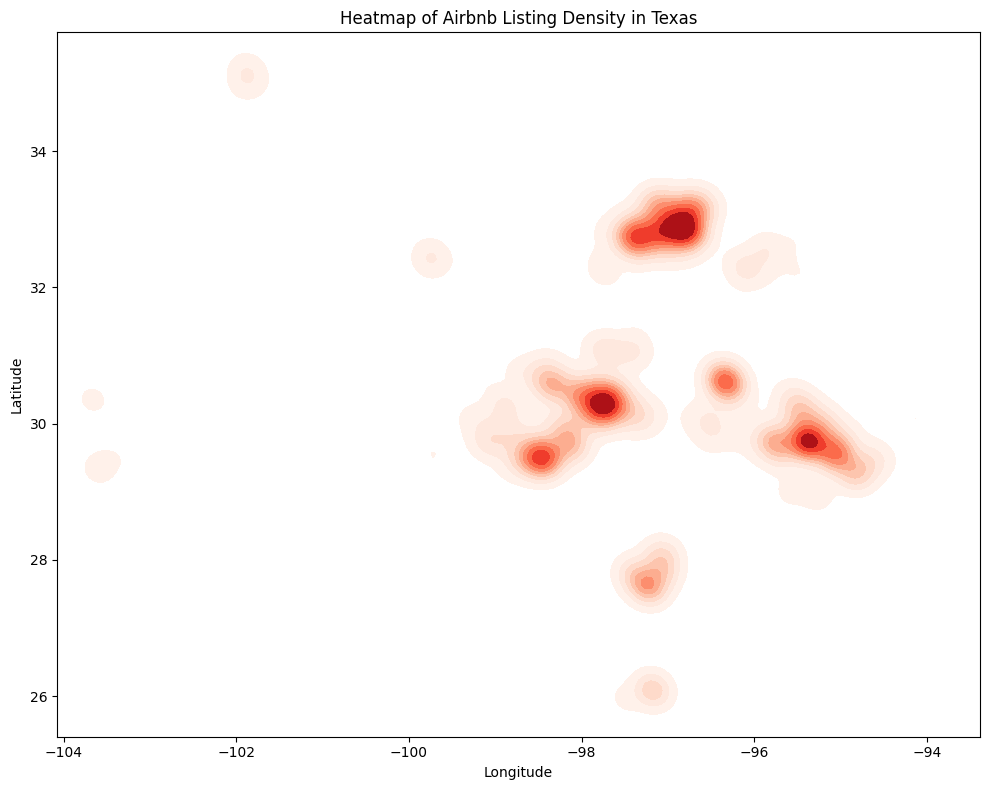

In [22]:
import matplotlib.pyplot as plt  # <- Add this line
import seaborn as sns

# Geographic Density of Listings
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=df['longitude'], y=df['latitude'],
    cmap="Reds", fill=True, bw_adjust=0.5
)
plt.title("Heatmap of Airbnb Listing Density in Texas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

7.Price vs. Bedrooms Scatterplot

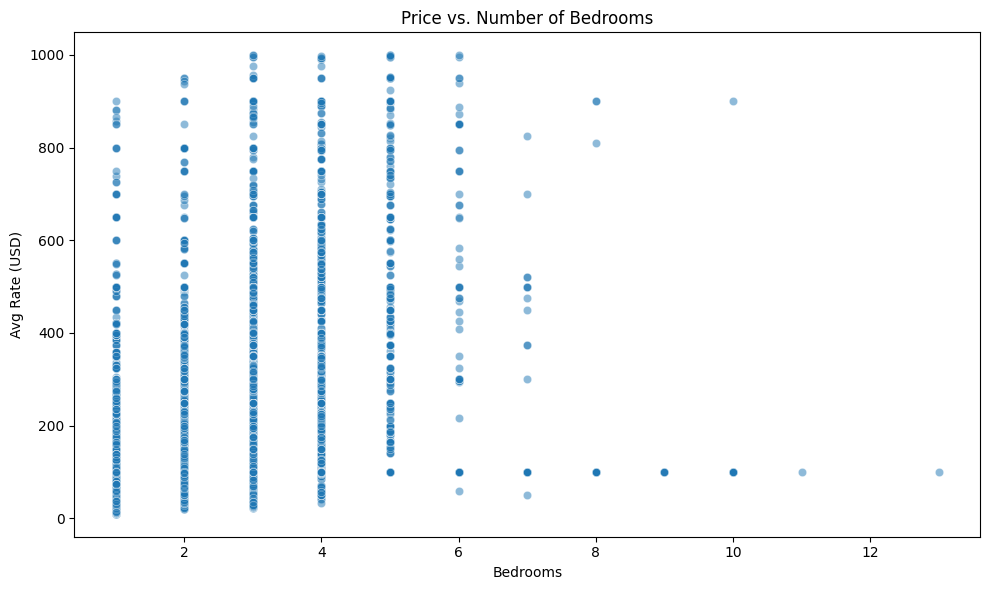

In [23]:
# Scatterplot of Bedrooms vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bedrooms', y='Avg_Rate', alpha=0.5)
plt.title("Price vs. Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Avg Rate (USD)")
plt.tight_layout()
plt.show()


8.Word Cloud from Descriptions

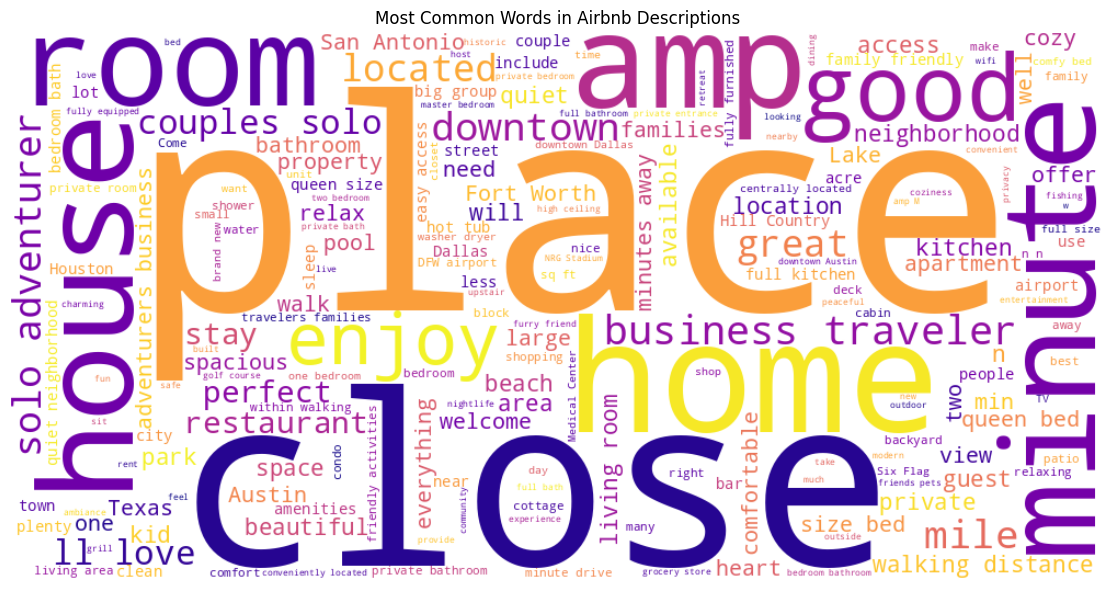

In [24]:
from wordcloud import WordCloud

# Step 8: Word Cloud of Description Texts
text = " ".join(df['Description'].dropna().tolist())

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Airbnb Descriptions")
plt.tight_layout()
plt.show()
